In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv("../data/cleaned_GenZ_DatingApp_Data.csv")

<Figure size 800x500 with 0 Axes>

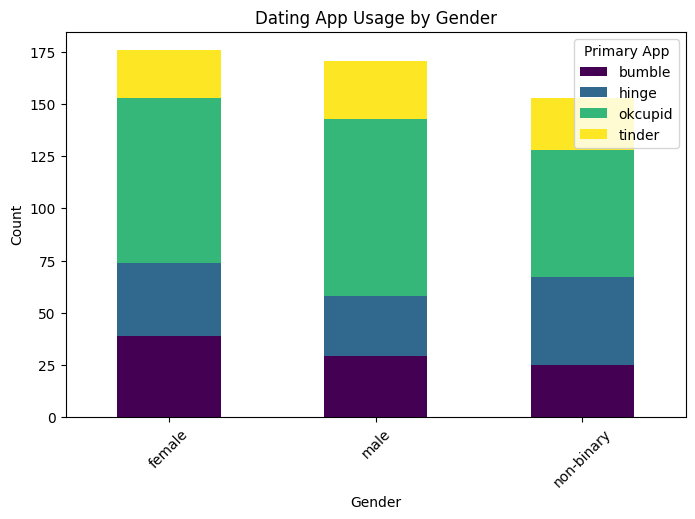

Chi-square Test: χ²=8.83, p-value=0.18336


In [3]:
# Stacked bar chart: Dating app usage by gender
plt.figure(figsize=(8, 5))
app_by_gender = df.groupby(['Gender', 'Primary_App']).size().unstack()
app_by_gender.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title("Dating App Usage by Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Primary App")
plt.show()

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(app_by_gender.fillna(0))
print(f"Chi-square Test: χ²={chi2:.2f}, p-value={p:.5f}")


<Axes: xlabel='Secondary_Apps', ylabel='count'>

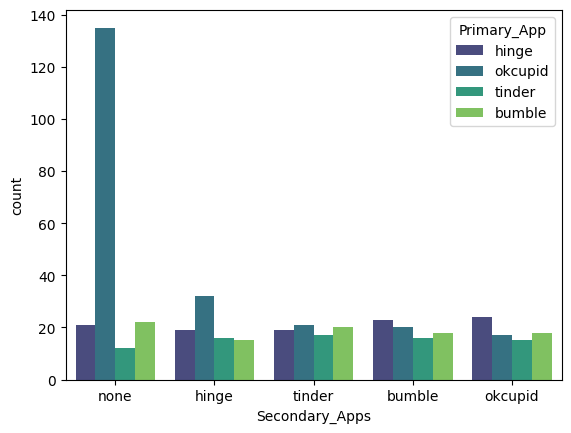

In [4]:
sns.countplot(data=df, x='Secondary_Apps', order=df['Secondary_Apps'].value_counts().index, palette='viridis', hue='Primary_App')

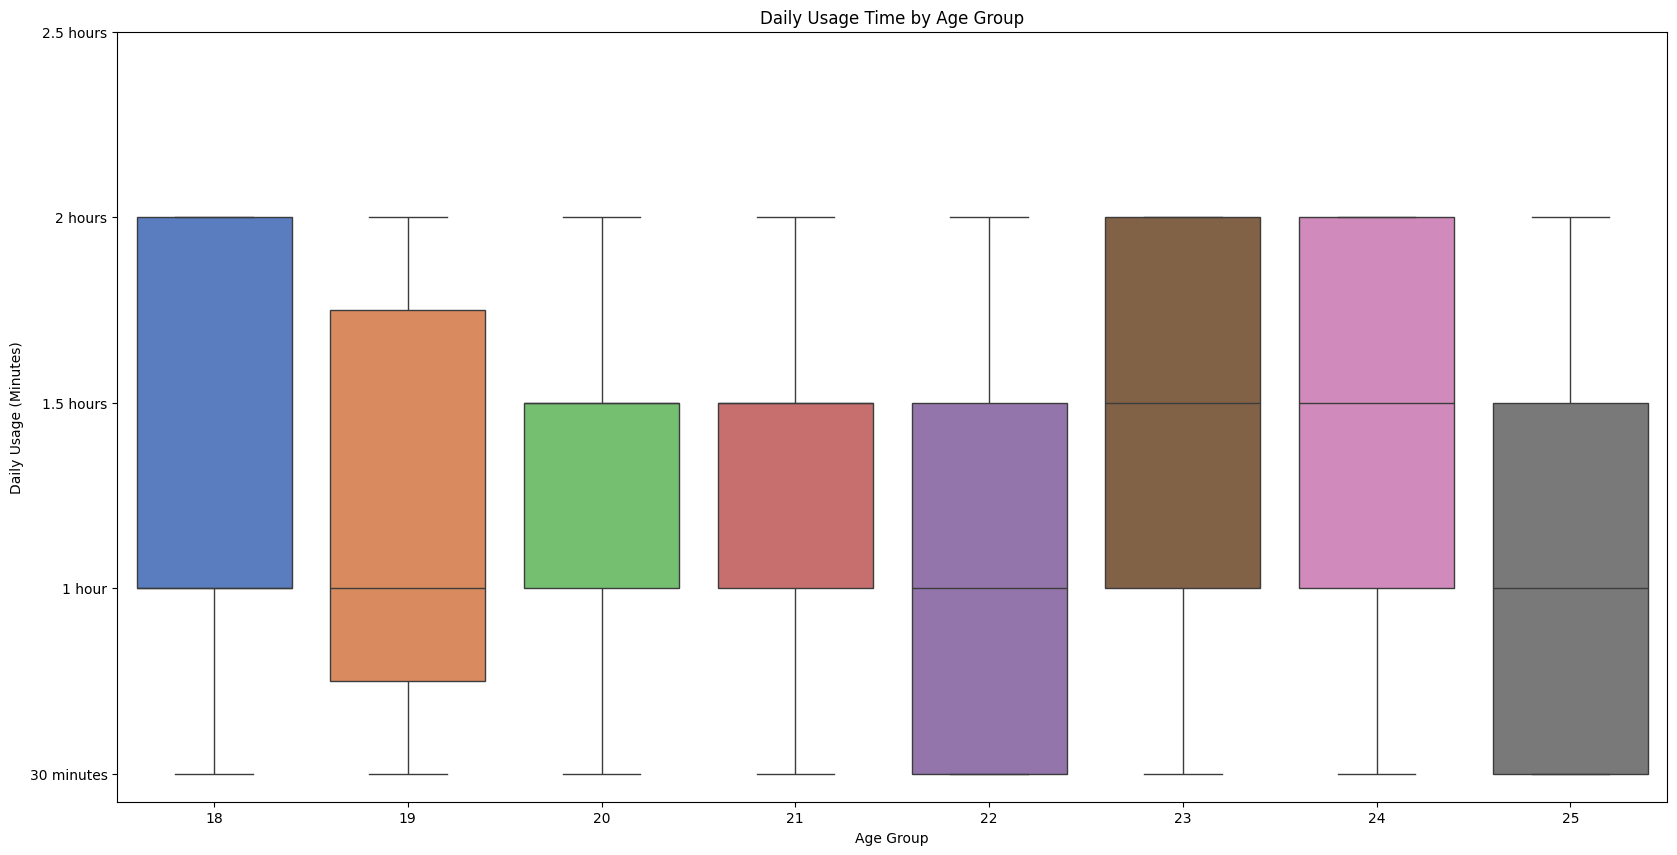

In [5]:
# Define age groups
bins = [18, 19, 20, 21, 22, 23, 24, 25, 26]
labels = ['18', '19', '20', '21', '22', '23', '24', '25']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert 'Daily_Usage_Time' to minutes if it's in string format like "1 hour 30 mins"
time_map = {
    "30 minutes": 30,
    "1 hour": 60,
    "1.5 hours": 90,
    "2 hours": 120,
    "2.5 hours": 150
}
df['Daily_Usage_Time'] = df['Daily_Usage_Time'].map(time_map)

# Plot average daily usage time per age group
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age_Group', y='Daily_Usage_Time', data=df, palette='muted', hue='Age', legend=False)

# Set custom y-axis labels
plt.yticks([30, 60, 90, 120, 150], ['30 minutes', '1 hour', '1.5 hours', '2 hours', '2.5 hours'])

plt.title("Daily Usage Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Daily Usage (Minutes)")
plt.show()


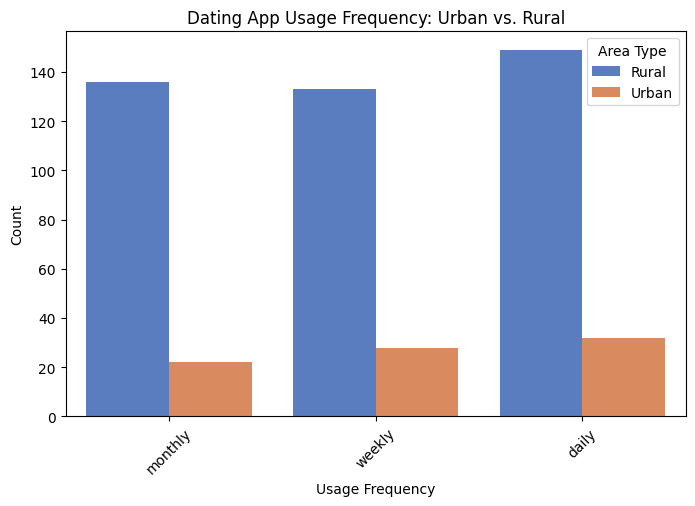

In [18]:
# Manually classify urban vs rural locations (urban are: dehli, mumbai)
urban_locations = ["dehli", "mumbai"]
df['Area_Type'] = df['Location'].apply(lambda x: 'Urban' if x in urban_locations else 'Rural')

# Compare usage frequency
plt.figure(figsize=(8, 5))
sns.countplot(x='Usage_Frequency', hue='Area_Type', data=df, palette='muted')
plt.title("Dating App Usage Frequency: Urban vs. Rural")
plt.xlabel("Usage Frequency")
plt.ylabel("Count")
plt.legend(title="Area Type")
plt.xticks(rotation=45)
plt.show()


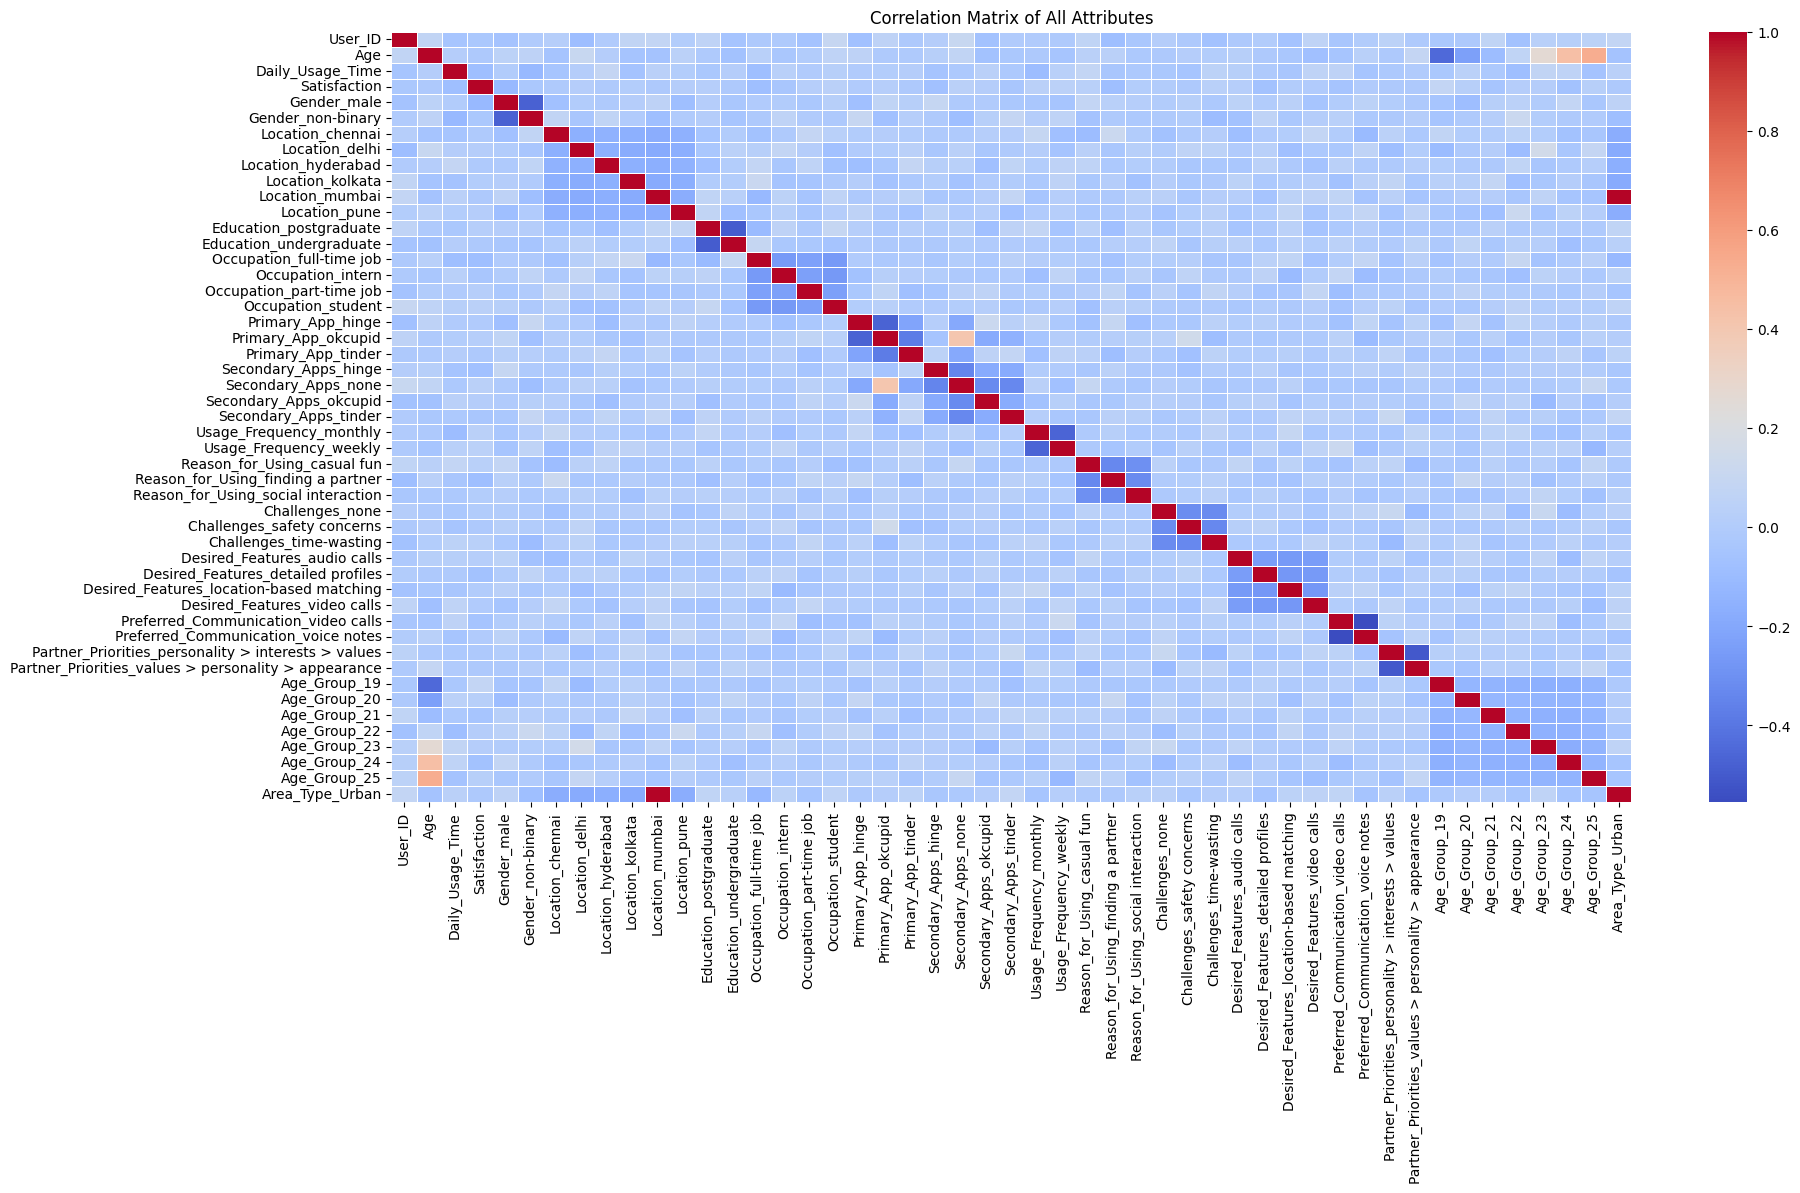

In [7]:
# Convert categorical attributes into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of All Attributes")
plt.show()

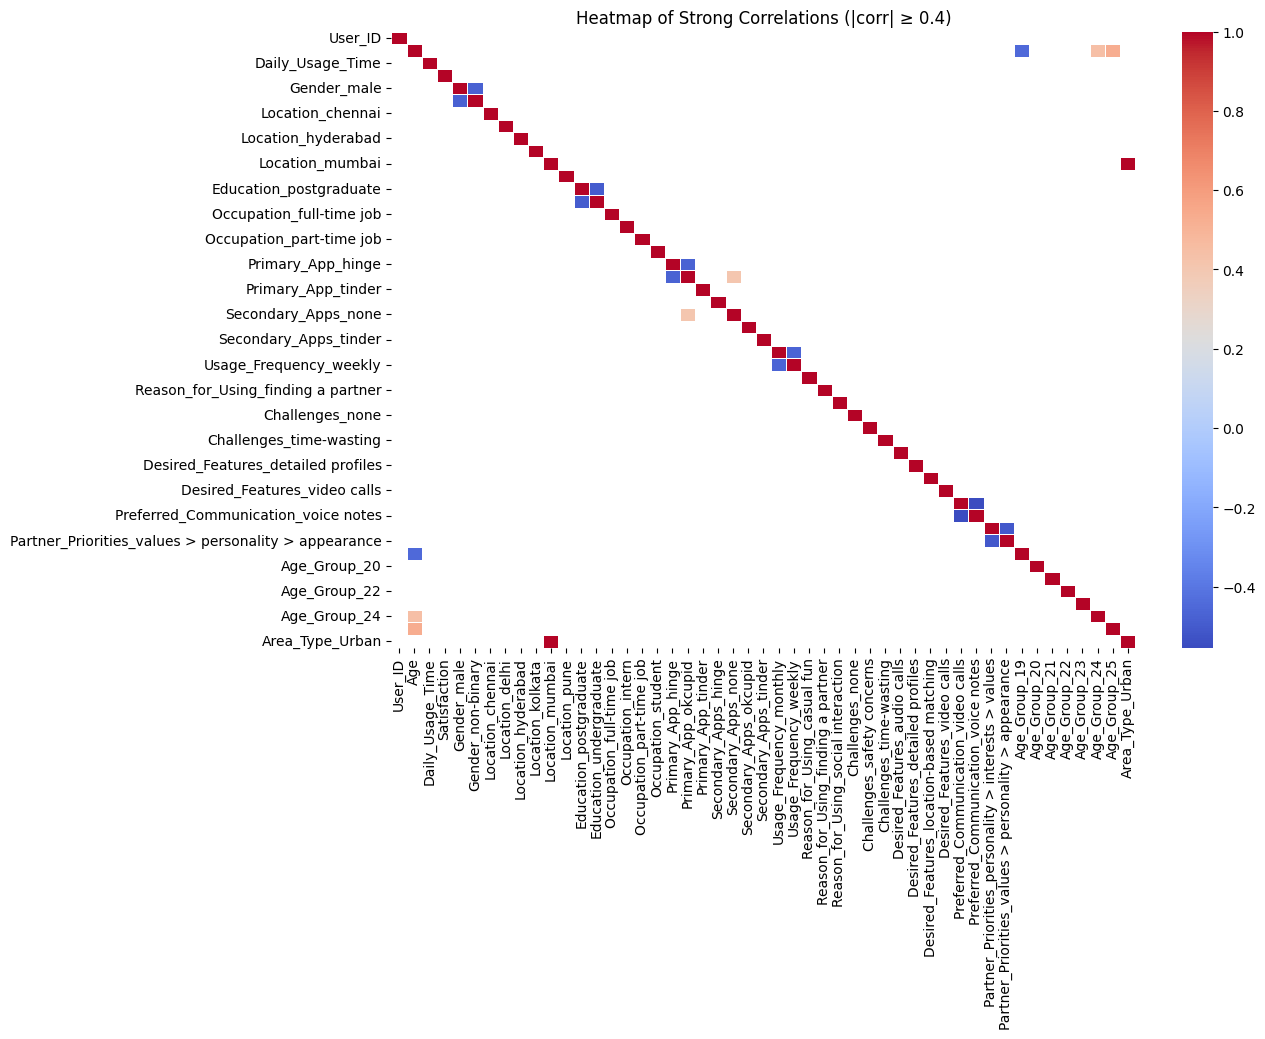

In [58]:
# Filter correlations with |corr| >= 0.4
strong_corr = corr_matrix[abs(corr_matrix) >= 0.4]

# Plot heatmap for strong correlations
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=strong_corr.isnull())
plt.title("Heatmap of Strong Correlations (|corr| ≥ 0.4)")
plt.show()

In [9]:
# Pivot Tables & Groupby Aggregations
pivot_gender = df.pivot_table(index='Gender', values=['Age', 'Satisfaction'], aggfunc=np.mean)
print("\nPivot Table by Gender:")
print(pivot_gender)

pivot_location = df.groupby('Location').agg({'Age': 'mean', 'Satisfaction': 'mean'})
print("\nAggregated Data by Location:")
print(pivot_location)

pivot_app = df.groupby('Primary_App').agg({'Age': 'mean', 'Satisfaction': 'mean'})
print("\nAggregated Data by Location:")
print(pivot_app)


Pivot Table by Gender:
                  Age  Satisfaction
Gender                             
female      21.261364      3.176136
male        21.736842      2.678363
non-binary  21.777778      2.849673

Aggregated Data by Location:
                 Age  Satisfaction
Location                          
bangalore  21.623188      2.898551
chennai    21.272727      2.863636
delhi      22.131579      2.960526
hyderabad  21.671875      2.875000
kolkata    21.302632      2.934211
mumbai     21.280488      2.853659
pune       21.820896      2.955224

Aggregated Data by Location:
                   Age  Satisfaction
Primary_App                         
bumble       21.397849      2.903226
hinge        21.839623      2.886792
okcupid      21.555556      2.933333
tinder       21.526316      2.855263


C:\Users\daryl\AppData\Local\Temp\ipykernel_18920\2034395851.py:2: FutureWarning: The provided callable <function mean at 0x000001FC7E741DA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_gender = df.pivot_table(index='Gender', values=['Age', 'Satisfaction'], aggfunc=np.mean)


<Figure size 800x500 with 0 Axes>

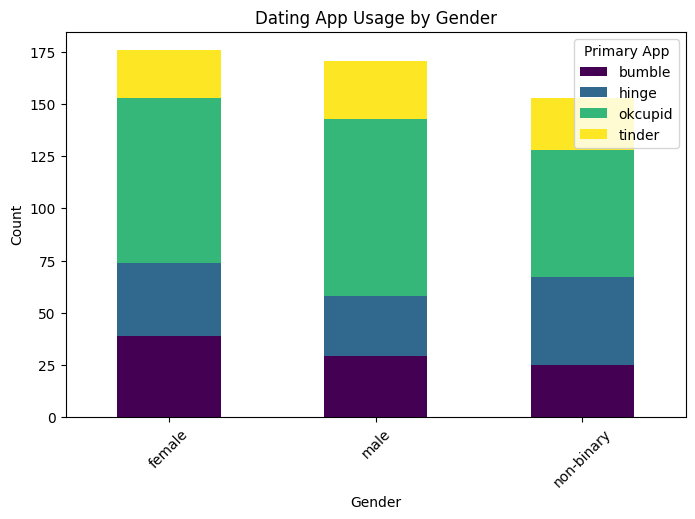

In [10]:
# Stacked Bar Chart: Dating App Usage by Gender
plt.figure(figsize=(8, 5))
dating_app_counts = df.groupby(['Gender', 'Primary_App']).size().unstack()
dating_app_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title("Dating App Usage by Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Primary App")
plt.show()

Gender Distribution:
 Gender
female        35.2
male          34.2
non-binary    30.6
Name: proportion, dtype: float64


C:\Users\daryl\AppData\Local\Temp\ipykernel_18920\4025941316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


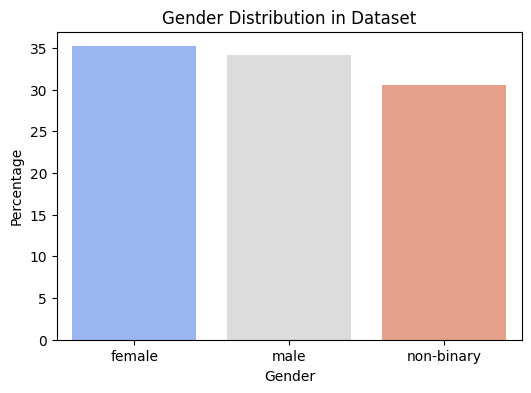

In [15]:
# Count users by gender
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_counts)

# Visualize gender distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title("Gender Distribution in Dataset")
plt.ylabel("Percentage")
plt.show()

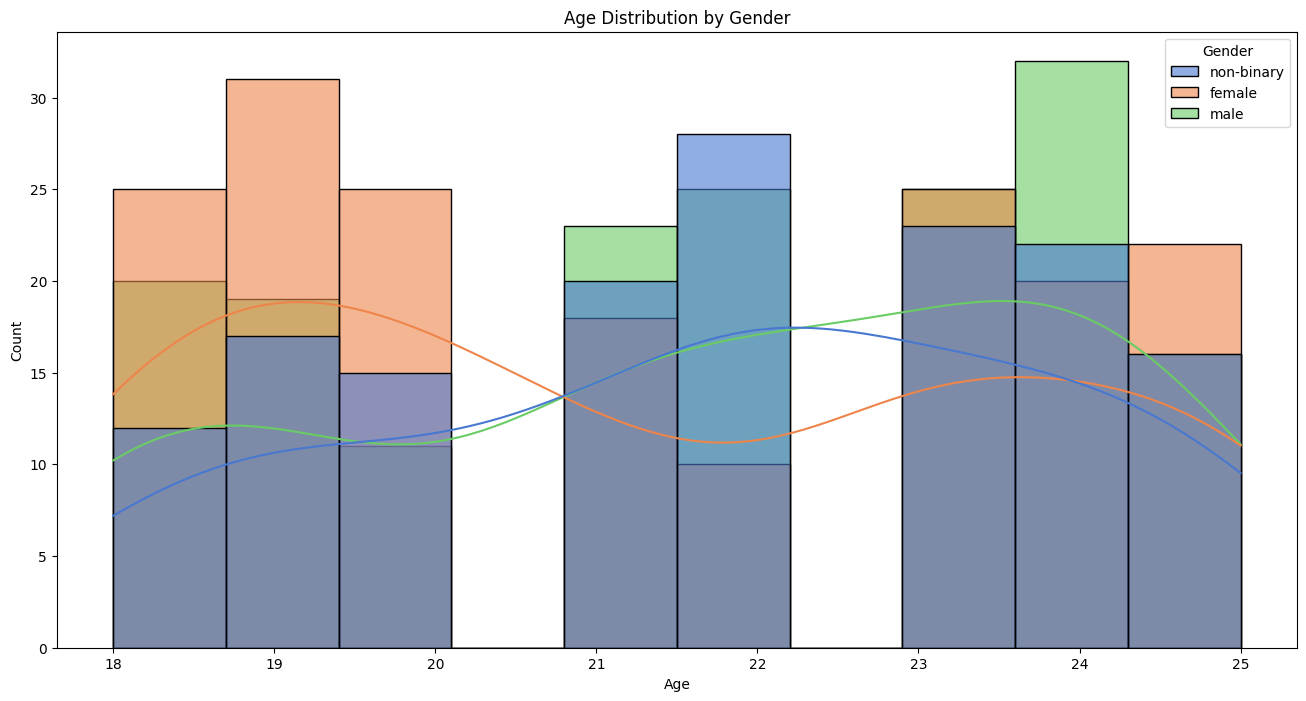

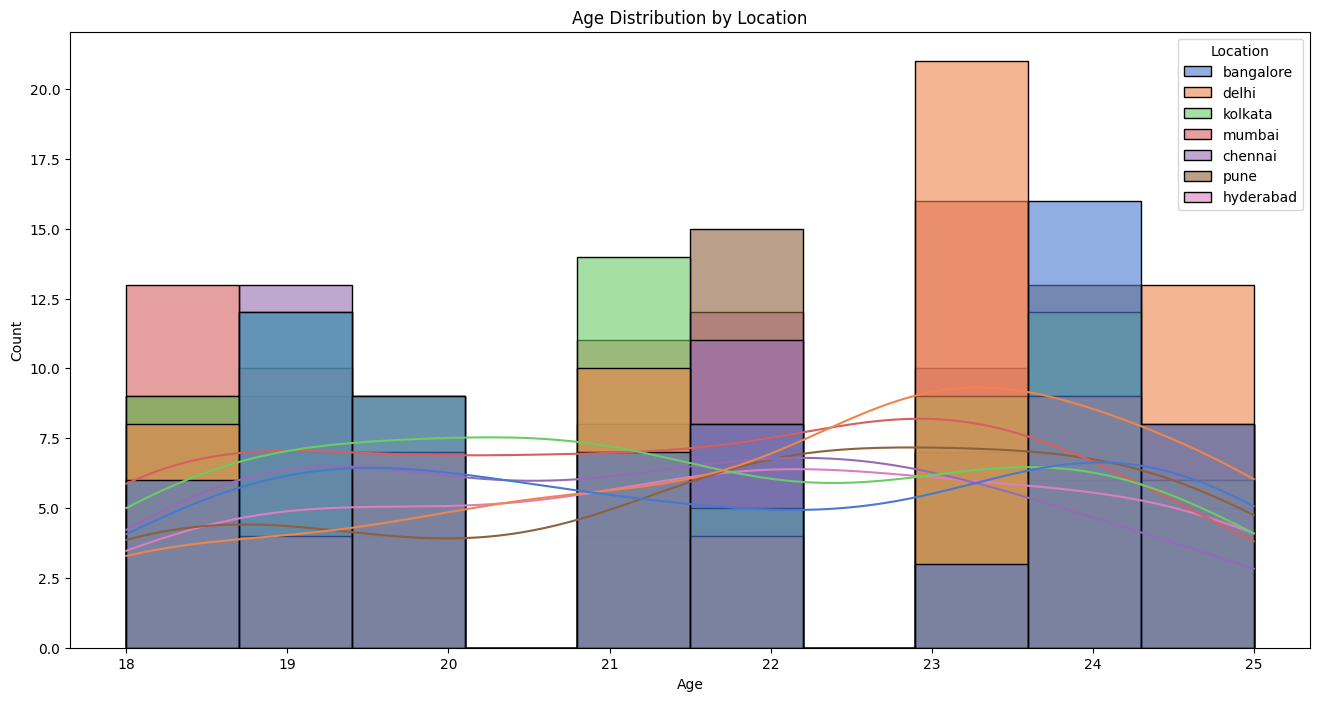

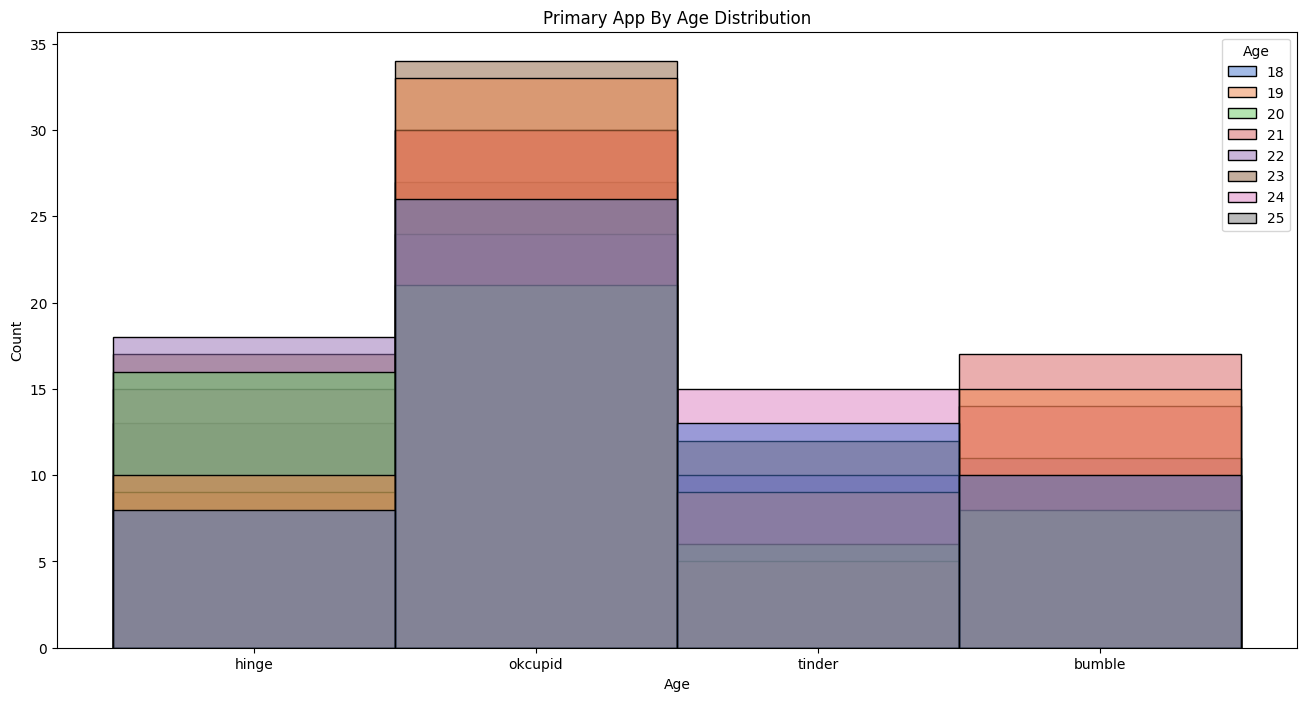

In [32]:
# Histograms and density plots for demographic comparisons
plt.figure(figsize=(16, 8))
sns.histplot(df, x='Age', hue='Gender', kde=True, bins=10, palette='muted', alpha=0.6)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df, x='Age', hue='Location', kde=True, bins=10, palette='muted', alpha=0.6)
plt.title("Age Distribution by Location")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df, x='Primary_App', hue='Age', palette='muted')
plt.title("Primary App By Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [22]:
# Identifying overrepresented and underrepresented groups
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution (%):\n", gender_counts)

location_counts = df['Location'].value_counts(normalize=True) * 100
print("Location Distribution (%):\n", location_counts)


Gender Distribution (%):
 Gender
female        35.2
male          34.2
non-binary    30.6
Name: proportion, dtype: float64
Location Distribution (%):
 Location
mumbai       16.4
delhi        15.2
kolkata      15.2
bangalore    13.8
pune         13.4
chennai      13.2
hyderabad    12.8
Name: proportion, dtype: float64


## Ethical considerations in data collection
- Bias in Sample Selection: The dataset may overrepresent urban users or certain gender identities.
- Inclusivity: Non-binary users and rural populations should be adequately represented.
- Privacy: Ensure that collected data follows ethical guidelines and is anonymized.
- Informed Consent: Participants should be aware of how their data is used.

In [46]:
# Line Charts: Trends over time (Example: Monthly app usage trends) cannot be done. There is no date column in the dataset
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df_resampled = df.resample('M').size()
    plt.figure(figsize=(10, 5))
    plt.plot(df_resampled, marker='o', linestyle='-')
    plt.title("Monthly Dating App Usage Trends")
    plt.xlabel("Month")
    plt.ylabel("Usage Count")
    plt.grid()
    plt.show()

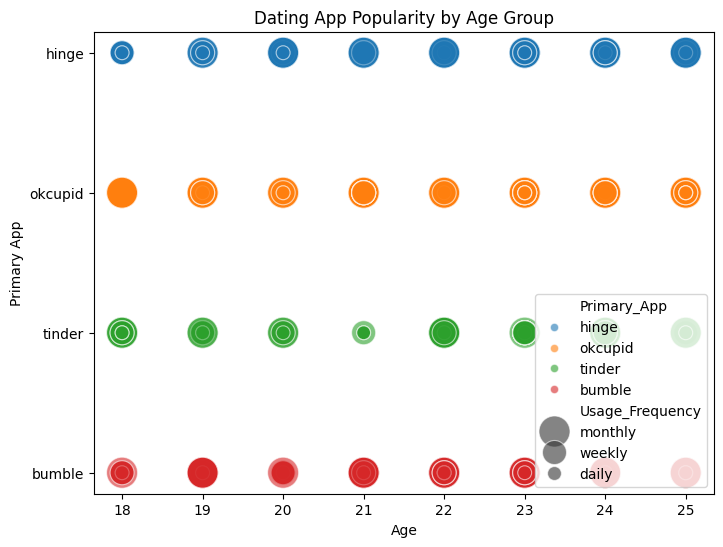

In [42]:
# Bubble Charts: Represent app popularity across age groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Primary_App', size='Usage_Frequency', hue='Primary_App', data=df, sizes=(100, 500), alpha=0.6)
plt.title("Dating App Popularity by Age Group")
plt.xlabel("Age")
plt.ylabel("Primary App")
plt.show()

C:\Users\daryl\AppData\Local\Temp\ipykernel_18920\1341460857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Usage_Frequency', y='Age', data=df, palette='coolwarm')


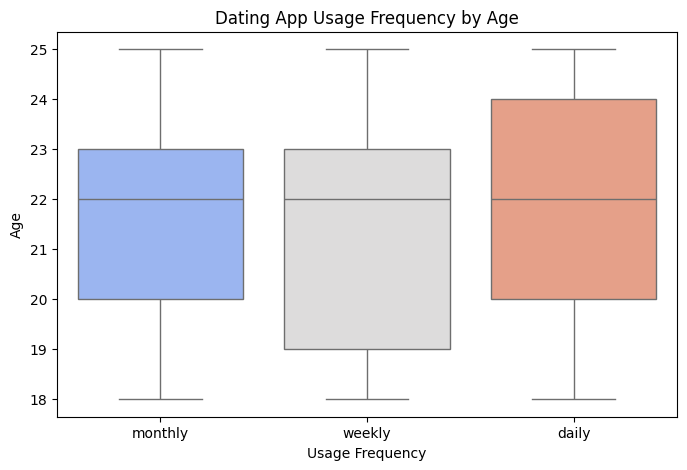

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Usage_Frequency', y='Age', data=df, palette='coolwarm')
plt.title("Dating App Usage Frequency by Age")
plt.xlabel("Usage Frequency")
plt.ylabel("Age")
plt.show()

<Figure size 800x500 with 0 Axes>

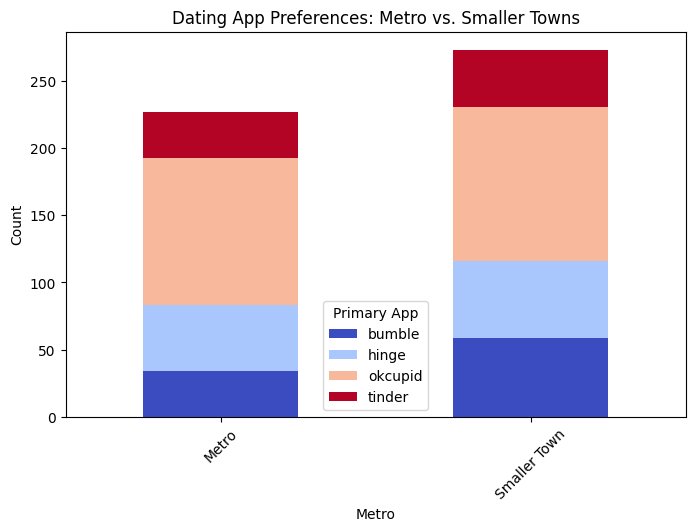

Usage_Frequency  daily  monthly  weekly
Metro                                  
Metro               92       66      69
Smaller Town        89       92      92


In [53]:
# Define metro and smaller towns (modify based on dataset)
metro_cities = ['delhi', 'mumbai', 'bangalore']
df['Metro'] = df['Location'].apply(lambda x: 'Metro' if x in metro_cities else 'Smaller Town')

# Stacked bar chart for app preference
plt.figure(figsize=(8, 5))
app_usage = df.groupby(['Metro', 'Primary_App']).size().unstack()
app_usage.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))
plt.title("Dating App Preferences: Metro vs. Smaller Towns")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Primary App")
plt.show()

# Compare usage frequency
usage_by_area = df.groupby('Metro')['Usage_Frequency'].value_counts().unstack()
print(usage_by_area)


In [ ]:
# Define categorical columns to encode
categorical_columns = [
    "Gender", "Location", "Education", "Occupation", "Primary_App", "Secondary_Apps", 
    "Usage_Frequency", "Daily_Usage_Time", "Reason_for_Using", "Satisfaction", 
    "Challenges", "Desired_Features", "Preferred_Communication", "Partner_Priorities"
]

# Apply One-Hot Encoding to categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_columns)

# Drop original categorical columns and concatenate encoded data
df = df.drop(columns=categorical_columns)
df = pd.concat([df, categorical_encoded], axis=1)

# Normalize numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Create new feature: Active App Count (Summing the number of apps used per user)
df["Active_App_Count"] = df["Primary_App"].notna().astype(int) + df["Secondary_Apps"].notna().astype(int)

# Save the processed dataset
df.to_csv("../data/processed_GenZ_DatingApp_Data.csv", index=False)

KeyError: 'Primary_App'